<a href="https://colab.research.google.com/github/raopani3/Coursera_ML_Project/blob/main/Predict%20the%20electrical%20energy%20output_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Imports required for this project
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

import seaborn as sns
import numpy as np

In [32]:
# Load the dataset
# open csv file from folder by providing actual path 'path/to/your/file.csv' to your CSV file.
data_path = '/content/sample_data/CourseraProject/CCPP_data.csv'
ccpp_data = pd.read_csv(data_path)

In [33]:
# Preprocessing
# Check for null values
ccpp_data.isnull().sum()

# Check for data types
ccpp_data.dtypes

# Check for unique values in each column
ccpp_data.nunique()

# Check for descriptive statistics
ccpp_data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [34]:
# Identify and  Selecting features and the target variable
features = ccpp_data[['AT', 'V', 'AP', 'RH']]
target = ccpp_data['PE']

In [35]:
# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

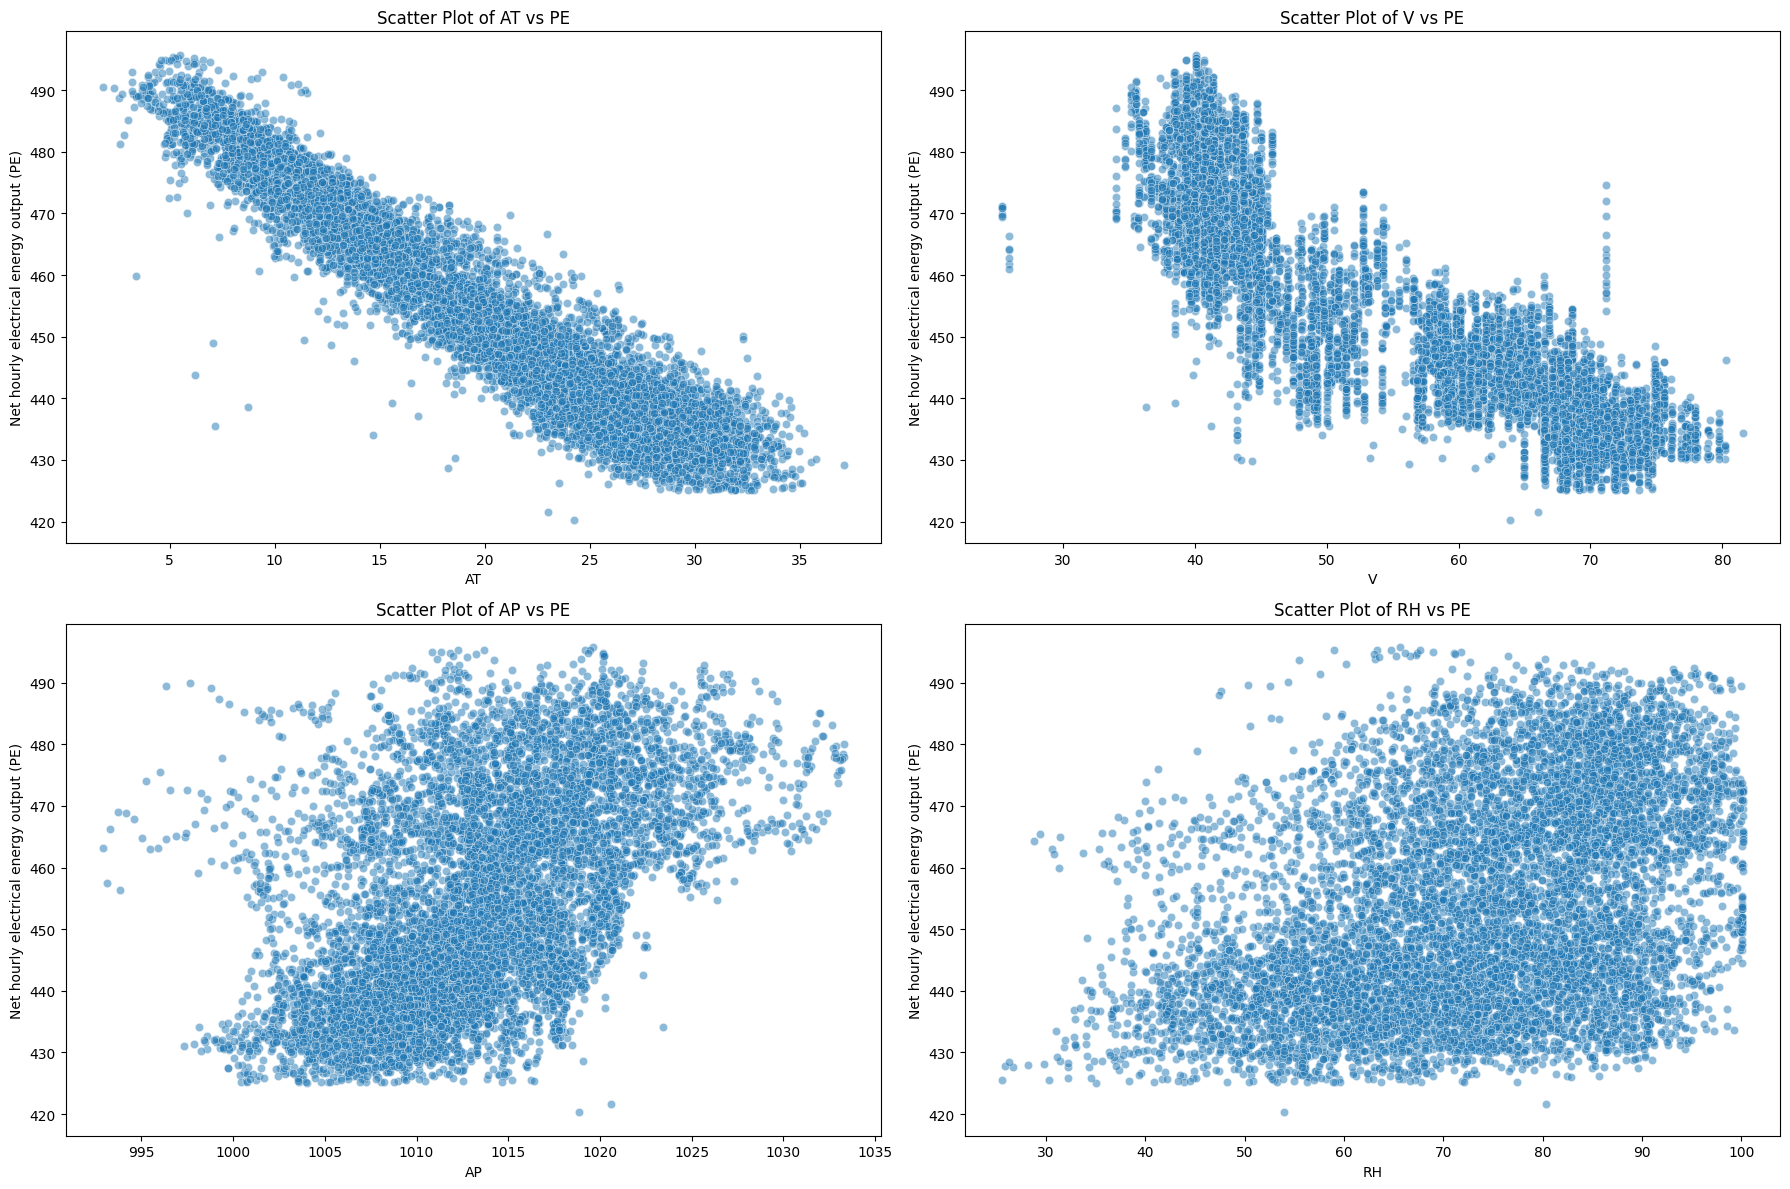

In [36]:
# Create scatter plots
plt.figure(figsize=(18, 12))

for i, feature in enumerate(['AT', 'V', 'AP', 'RH']):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=ccpp_data[feature], y=ccpp_data['PE'], alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs PE')
    plt.xlabel(feature)
    plt.ylabel('Net hourly electrical energy output (PE)')

plt.tight_layout()
plt.show()

# Models Choosen : **Linear Regression & Random Forest**



# Identification of the Algorithm are based on the below points.


**Linear Regression**
1. Simple: Linear Regression is one of the simple and straighforward machine learning algorithms
2.   Interpretable: Easy to interpret as it assumes linear relationship between *Input feature*s & *Target variable*

**Random Forest**


1. Non-linearity: Can handle non-linear relationships between features and the target. It does this through ensemble learning, where multiple decision trees are combined to make more accurate and stable predictions
(I can see some non linearity between Rh, AP Vs PE)
2. Random Forest is less prone to overfitting compared to other complex models because it averages multiple trees. This robustness often translates to high performance on a variety of tasks without the need for extensive hyperparameter tuning.


# Identification of the Metrics for this project are based on the below points.

Root Mean Squared Error (RMSE):



1. **Interpretability in Context**: RMSE is measured in the same units as the target variable, which, in this case, is megawatts (MW). This makes it straightforward to understand the magnitude of errors in a real-world context. For instance, an RMSE of 3 MW means that the average error between the predicted values and the actual values is about 3 MW, which provides a clear and direct interpretation of the model's prediction accuracy in terms understandable to stakeholders.
2. **Common Usage in Regression**: RMSE is a widely used and standard metric for regression problems. Its commonality allows for easier comparison with other studies or models in similar domains. It helps in benchmarking the model's performance against industry standards or previously published results.
3. **Sensitivity to Large Errors**: RMSE squares the residuals before averaging, which gives higher weight to larger errors. This characteristic is particularly useful in applications like power output prediction, where larger deviations can be more detrimental and thus should be more heavily penalized. RMSE effectively highlights model performance in terms of handling larger discrepancies




In [37]:
# Splitting the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)



# Evaluate the models using RMSE


In [38]:
# Initialize the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)


In [39]:
# Perform 5-fold cross-validation and compute RMSE
def evaluate_model_with_cv(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    return rmse_scores.mean()

In [40]:
linear_cv_rmse = evaluate_model_with_cv(linear_model, X_train, y_train)
rf_cv_rmse = evaluate_model_with_cv(random_forest_model, X_train, y_train)

In [41]:
print("Cross-Validated RMSE for Linear Regression:", linear_cv_rmse)
print("Cross-Validated RMSE for Random Forest:", rf_cv_rmse)

Cross-Validated RMSE for Linear Regression: 4.539860858528058
Cross-Validated RMSE for Random Forest: 3.5135267190970985





> When evaluating the performance of the regression models in this project, the Root Mean Squared Error (RMSE) is utilized as the key metric. RMSE provides a clear indication of how well each model predicts the electrical energy output of the Combined Cycle Power Plant. It measures the average magnitude of the errors between the predicted values from our models and the actual values in the dataset, giving us the standard deviation of these prediction errors in megawatts (MW).

For this project, lower RMSE values indicate a better fit of the model to the data, as it reflects smaller differences between predicted and actual outputs. Here are some specific evaluations using RMSE:


Linear Regression: An RMSE of 4.54 MW suggests that the predictions made by the Linear Regression model typically deviate from the actual values by about 4.54 MW. Given the range of the target variable (PE), this value provides a baseline performance. The simplicity of Linear Regression makes it easy to interpret but might limit its ability to capture more complex patterns in the data.
Random Forest: The Random Forest model achieved an RMSE of 3.51 MW, indicating a more accurate fit compared to Linear Regression. This improvement suggests that the complex relationships and interactions between features are better captured by the ensemble of decision trees in the Random Forest model.
The comparison between these models indicates that for this specific dataset, taking into account nonlinear relationships and interactions (as Random Forest does) results in more accurate predictions of power output. This analysis underscores the importance of selecting a model that aligns well with the characteristics of the data and the specific needs of the prediction task.

